# How much score will a student score?
In this notebook, we will explore the score each student will score based on the number of hours studied.

We will first explore the dataset, then we will fit a predictive model.

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This notebook was made on Kaggle. It might not work if input path is different. 
## Please change the _dataPath variable as per needs
### Change this if needed, can use "./scores.csv"

_dataPath = "../input/linear-regression-simple/scores.csv"   

data = pd.read_csv(_dataPath)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We have two columns, hours of studying and score on a particular test. Let us see the data.

In [4]:
# Check for null or missing values
data.isnull().any()

Hours     False
Scores    False
dtype: bool

# EDA

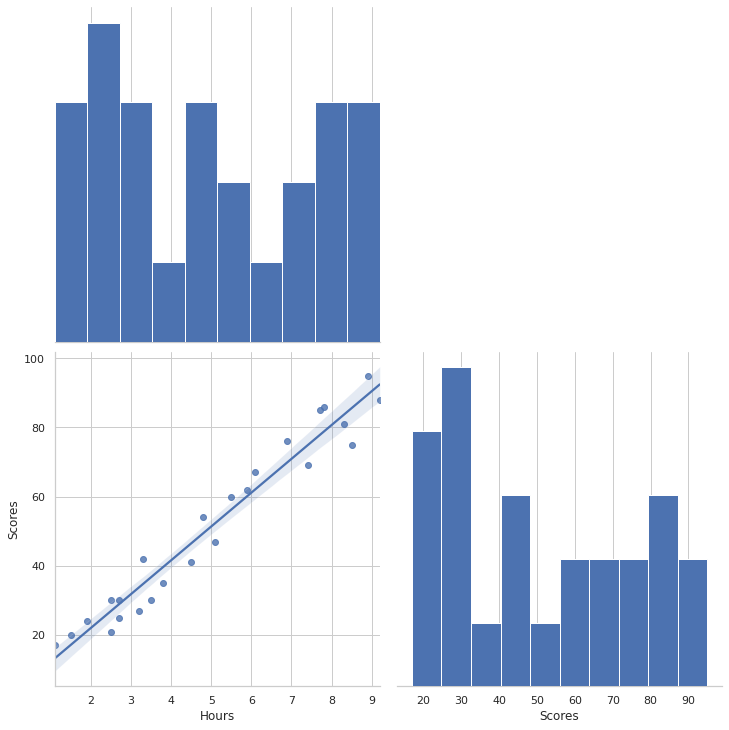

In [5]:
sns.set(style = 'whitegrid')
sns.pairplot(data, corner =True, kind = 'reg', height = 5);

Seaborn gives us a nice Plot along with the regression lines. The linear trend is very much clear. Our job is now to find an appropriate line and fit a model. 

# Correlation Test

Correlation gives the amount of linear dependency betwee two variables. Let us import `pearsonr` from `scipy.stats` to measure how much linearly dependent the variables are.

In [6]:
from scipy.stats import pearsonr

statistics = pearsonr(data['Hours'], data['Scores'])
statistics

(0.9761906560220884, 9.132624467460325e-17)

As we can see, there is high correlation coefficient(first value) between the two values.

The p-value(second value) is smaller than 0.05, so our hypothesis that there is linear relationship between the data is significant

# Modelling using sklearn

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [8]:
linearModel = LinearRegression()

## Reshaping is required for sklearn models.
## -1 indicates that sklearn should automatically calculate this value from the dataset

linearModel.fit(data['Hours'].values.reshape(-1, 1),
                data['Scores'].values.reshape(-1, 1));

Let us now get the coefficeints and values

In [9]:
linearModel.coef_, linearModel.intercept_

(array([[9.77580339]]), array([2.48367341]))

As we can see,

The intercept is about 2.4. It means that with 0 hours of study you can get this Score.

The coefficient is about 9.77. This means that with each hour of study, your expected score increases by about 10 marks.
<hr>

Now we will calculate the goodness of fit of the model.

In [10]:
## Score of the values
r2_score(data['Scores'].values.reshape(-1, 1),
         linearModel.predict(data['Hours'].values.reshape(-1, 1)))

0.9529481969048356

We can conclude that our model is about 95% accurate

# Final Plot

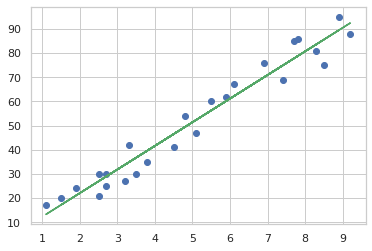

In [11]:
preds = linearModel.predict(data['Hours'].values.reshape(-1, 1))
plt.plot(data['Hours'],preds,'g')
plt.scatter(data['Hours'], data['Scores']);

# Residual Plot

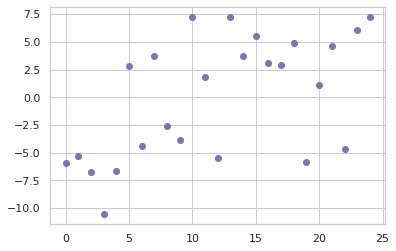

In [12]:
plt.plot(data['Scores'] - preds.flatten(), 'mo');